In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_files

In [3]:

wine =load_files()

my_df=pd.DataFrame(wine.data,columns=wine.feature_names)

In [10]:
my_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [36]:
my_df["target"]=wine.target
my_df.head(5)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [24]:
x=my_df.drop('target', axis=1)
y=my_df['target']
x.shape,y.shape

((178, 13), (178,))

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
print("Training set shape: ", x_train.shape,y_train.shape)

print("Testing set shape: ", x_test.shape,y_test.shape)

Training set shape:  (142, 13) (142,)
Testing set shape:  (36, 13) (36,)


In [26]:
from sklearn.linear_model import LinearRegression
# import LinearRegresssion
# create a linear regression model
lr=LinearRegression()

In [28]:
# train the model on the training set -this is how the model Learns
lr.fit(x_train,y_train)

LinearRegression()

In [30]:
# predict the testing set
# y_preds are predicted values of the target variable based on the features
# Once we have those preds , we can compare the actual values od the target
# To evaluate the perfomence of the model.
y_pred=lr.predict(x_test)
y_pred.shape

(36,)

In [35]:
# some import
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
# Evaluate the perfomence of the model
# r2: varience of the dependent variable (target) explained by the independent variable (features)
# how well the model fits the data . Higher is better
r2=r2_score(y_test,y_pred)

# MSE: Avrage Squared disance between the predicted and actual values. lower is better

mse=mean_squared_error(y_test,y_pred)
# MAE: Avrage Absolute disance between the predicted and actual values. lower is better

mae=mean_absolute_error(y_test,y_pred)

# Intercept: starting point of the regression line on the y-axis.
# Value of the dependent variable (target) when the independent variables (features) are zero 
# If positive number , target increase as features increase , if nagative - opposite
intercept=lr.intercept_



# printing the process
print("R2 score",r2)
print("Mean Squared Error : ", mse)
print("Mean Absolute Error :" ,mae)
print("intercept" ,intercept)

R2 score 0.8825140263270388
Mean Squared Error :  0.06853348464256069
Mean Absolute Error : 0.20304725956613057
intercept 3.2928247019814485


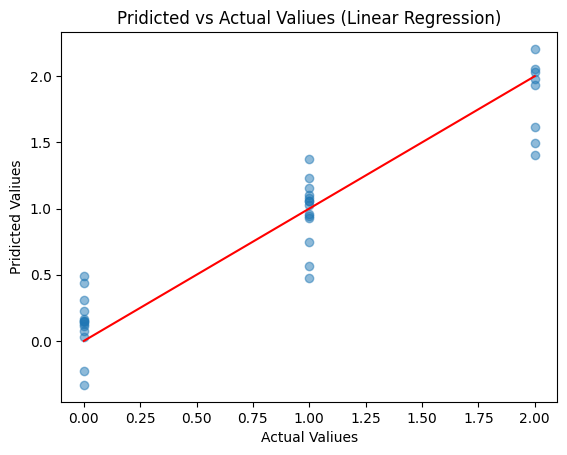

In [39]:
import matplotlib.pyplot as plt
# Plot the pridicted vs actual values 
# predicted values of the target variable are platted on the x-axis
# Actual values of the target variable are plotted on the y-axis
# if the model is a good fit , the points should be close to the diagonal line.
# indicating a strong linear relationship between the actual and predicted values.
plt.scatter(y_test,y_pred,alpha=0.5)
plt.plot([y.min(),y.max()],[y.min(),y.max()], color="red")
plt.xlabel("Actual Valiues")
plt.ylabel("Pridicted Valiues")
plt.title("Pridicted vs Actual Valiues (Linear Regression)")
plt.show()
 

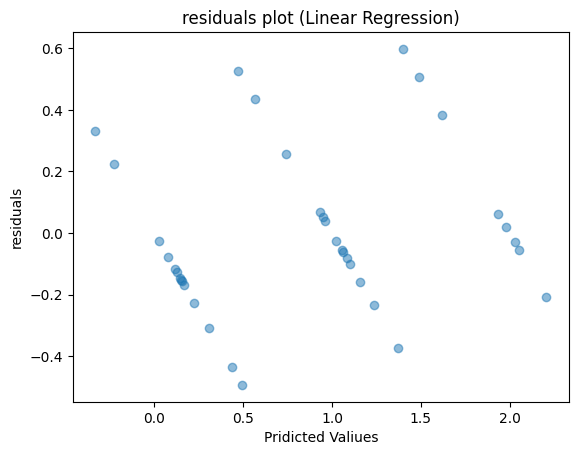

In [40]:
# Plot the residuals
# The residuals are plotted against the predicted values of the target variable.
# if the linear regression model is a good fit for the data,
# the residual plot should show a random scatter of the points around zero
# With no discernable trend.

plt.scatter(y_pred,y_test-y_pred,alpha=0.5)

plt.xlabel("Pridicted Valiues")
plt.ylabel("residuals")
plt.title("residuals plot (Linear Regression)")
plt.show()
